In [40]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression as LM
from patsy import dmatrices

### Linear Regression and Learning Curve challenges


##### Challenge 1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     840.4
Date:                Thu, 16 Jul 2015   Prob (F-statistic):           3.58e-50
Time:                        14:44:26   Log-Likelihood:                -436.13
No. Observations:                 100   AIC:                             874.3
Df Residuals:                      99   BIC:                             876.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            14.3458      0.495     28.990      0.000        13.364    15.328
==============================================================================
Omnibus:                        4.466   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                3.695
Skew:                           0.366   Prob(JB):                        0.158
Kurtosis:                       2.408   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

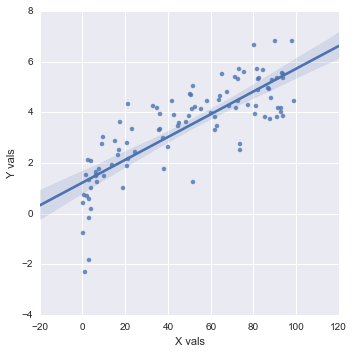

In [41]:
%matplotlib inline
xs = np.random.uniform(low=0, high=100, size=100)
ys = [np.log(i) + np.random.normal(0, 1) for i in xs]
X = pd.DataFrame(data={'X vals': xs, 'Y vals': ys})
sns.lmplot(x='X vals', y='Y vals', data = X)
sm.OLS(xs, ys).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ys   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     88.19
Date:                Thu, 16 Jul 2015   Prob (F-statistic):           2.54e-15
Time:                        14:44:27   Log-Likelihood:                -126.41
No. Observations:                 100   AIC:                             256.8
Df Residuals:                      98   BIC:                             262.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0593      0.413      0.144      0.886        -0.760     0.878
np.log(xs)     1.0002      0.107      9.391      0.000         0.789     1.212
==============================================================================
Omnibus:                        6.150   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.530
Skew:                           0.525   Prob(JB):                       0.0630
Kurtosis:                       3.474   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

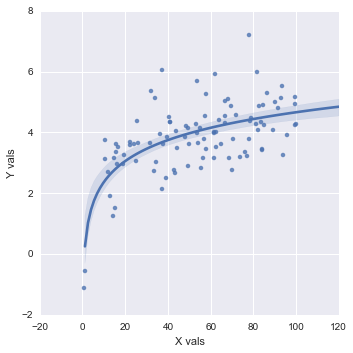

In [42]:
%matplotlib inline
xs = np.random.uniform(low=0, high=100, size=100)
inter = [1 for _ in range(len(xs))]
ys = [np.log(i) + np.random.normal(0, 1) for i in xs]
X = pd.DataFrame(data={'X vals': xs, 'Y vals': ys})
sms.lmplot(x='X vals', y='Y vals', data = X, logx=True)
y, X = dmatrices('ys ~ np.log(xs)', data=X, return_type='dataframe')
sm.OLS(y, X).fit().summary()


##### Challenge 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     2197.
Date:                Thu, 16 Jul 2015   Prob (F-statistic):           2.14e-69
Time:                        14:44:32   Log-Likelihood:                -165.97
No. Observations:                 100   AIC:                             333.9
Df Residuals:                      99   BIC:                             336.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.1100      0.002     46.870      0.000         0.105     0.115
==============================================================================
Omnibus:                       11.916   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.631
Skew:                          -0.894   Prob(JB):                      0.00110
Kurtosis:                       2.733   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

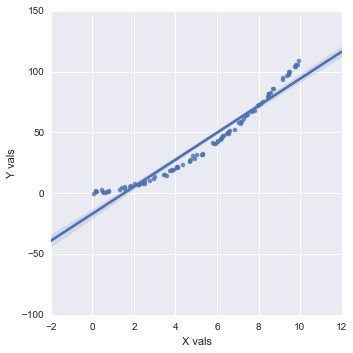

In [43]:
%matplotlib inline
xs = np.random.uniform(low=0, high=10, size=100)
ys = [x + x**2 + np.random.normal(0, 1) for x in xs]
X = pd.DataFrame(data={'X vals': xs, 'Y vals': ys})
sns.lmplot(x='X vals', y='Y vals', data = X)
sm.OLS(xs, ys).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ys   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1675.
Date:                Thu, 16 Jul 2015   Prob (F-statistic):           1.98e-63
Time:                        14:45:27   Log-Likelihood:                -348.57
No. Observations:                 100   AIC:                             701.1
Df Residuals:                      98   BIC:                             706.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -16.8670      1.663    -10.142      0.000       -20.167   -13.567
xs            11.1105      0.271     40.930      0.000        10.572    11.649
==============================================================================
Omnibus:                       19.414   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.771
Skew:                           0.581   Prob(JB):                      0.00756
Kurtosis:                       2.003   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

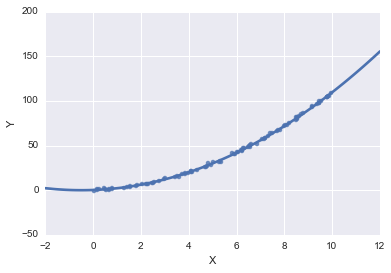

In [48]:
X = pd.DataFrame(data={'X': xs, 'Y': ys})
sns.regplot(x='X', y='Y', data=X, order=2)
y, X = dmatrices('ys ~ xs + xs**2', data=X, return_type='dataframe')
sm.OLS(y, X).fit().summary()


##### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error
 * test error
 * R squared
 * AIC


In [ ]:
xs = np.random.uniform(low=0, high=10, size=100)
ys = [x + x**2 + np.random.normal(0, 1) for x in xs]
for i in range(8):
    np.polyfit(x, y, i)


##### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.